## problem statement:
**create a model that can predict survival rate in a ship taking into consideration factors sorrounding passengers aboard the Titanic.**
## metric of sucess
Come up with a model that can effectively predict survivors and non-survivors in a ship tragedy

In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data understanding

    **Variable**	**Definition**	**Key**
    1	survival	Survival	0 = No, 1 = Yes
    2	pclass  	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    3	sex	        Sex	
    4	Age	        Age in years	
    5	sibsp	    # of siblings / spouses aboard the Titanic	
    6	parch	    # of parents / children aboard the Titanic	
    7	ticket	    Ticket number	
    8	fare	    Passenger fare	
    9	cabin	    Cabin number	
    10	embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [3]:
df = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Datasets\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Cleanning the dataset**

In [4]:
#droping the 'Name' and 'PassengerId' columns since names and passengerid do not play a role in their survival
df.drop(columns = ['Name','PassengerId' ],axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:

df.shape

(891, 10)

In [6]:
#checking for missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
#droping 'Cabin' colun because it has many missing values
df.drop(['Cabin'],1, inplace = True)


In [8]:
#Filling missing values for age with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
#dropping any missin g value
df = df.dropna()

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [12]:
#we will drop 'Tickets' will de dropped , because Tickets are a representation of fare and class.
#Besides, the ticket column has many duplicates

print('no. of unique values:',len(df.Ticket.unique()))
print('no. of rows: ', df.Ticket.count())

#dropping Ticket

df =df.drop(['Ticket'],1)

no. of unique values: 680
no. of rows:  889


In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

## Exploratory Data Analysis

Univariate analysis

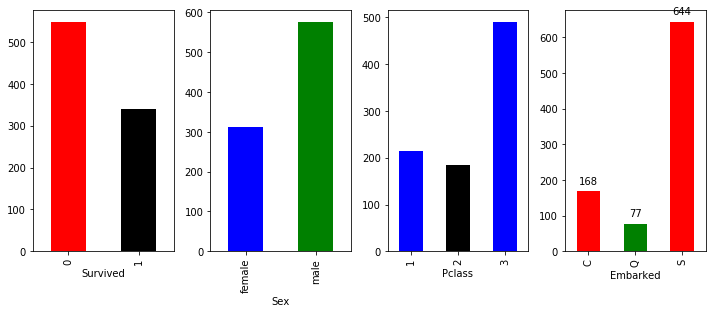

In [15]:
plt.figure(figsize=(10,8))
plt.subplot(2,4,1)
ax = df.groupby(['Survived'])['Survived'].count().plot(kind = 'bar', color = ('r','k'))
plt.subplot(2,4,2)
ax = df.groupby(['Sex'])['Sex'].count().plot(kind = 'bar',color = ('b','g'))
plt.subplot(2,4,3)
ax = df.groupby(['Pclass'])['Pclass'].count().plot(kind = 'bar',color = ('b','k'))
plt.subplot(2,4,4)
ax = df.groupby(['Embarked'])['Embarked'].count().plot(kind = 'bar',color = ('r','g'))
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=1), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

**Observations:** the number of passengers who perished are more than those who survived, most of the paseseners were of the male gender, most of the passengers booked for 3rd-class accomodation while on cruise  and lastly, most of the passengers embarked on the port of Southampton.

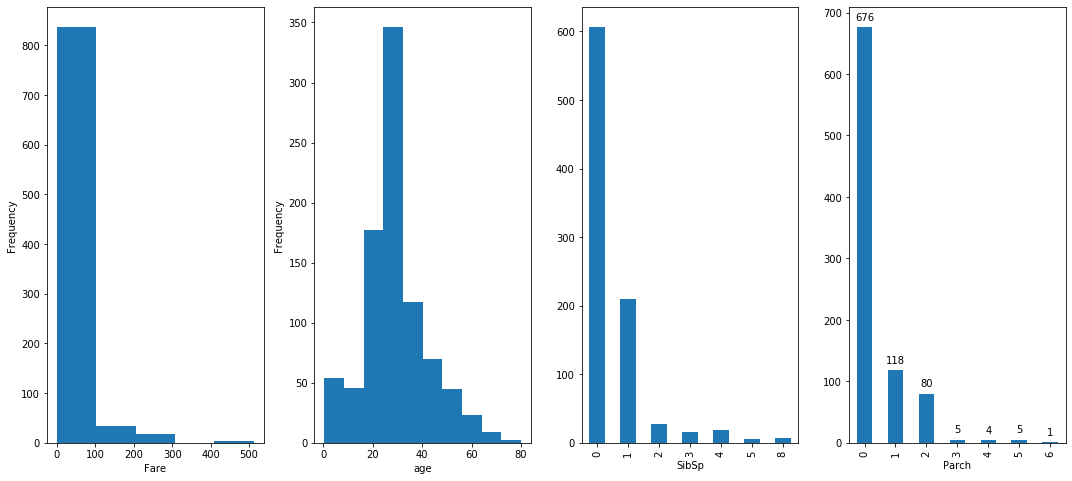

In [16]:
plt.figure(figsize=(15,13))
plt.subplot(2,4,1)
ax = df['Fare'].plot(kind = 'hist', bins = 5)
ax.set_xlabel('Fare')
plt.subplot(2,4,2)
ax = df['Age'].plot(kind = 'hist', bins = 10)
ax.set_xlabel('age')
plt.subplot(2,4,3)
ax = df.groupby(['SibSp'])['SibSp'].count().plot(kind = 'bar')
plt.subplot(2,4,4)
ax = df.groupby(['Parch'])['Parch'].count().plot(kind = 'bar')
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=1), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

 **obserbvation:** most passengers paid $100 to cruise in the Titanic and most of the passengers were between 20 to 35 years of age.Majority of the passenegers had no sibling relationships and most of the passengers had no parent-child/children relationship aboard the Titanic

In [17]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Bivariate analysis

In [18]:
#label encoding categorical data
df['Age'] = df['Age'].astype(int)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.dtypes[df.dtypes == 'object'].index
df[['Sex', 'Embarked']] = df[['Sex',  'Embarked']].apply(le.fit_transform)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


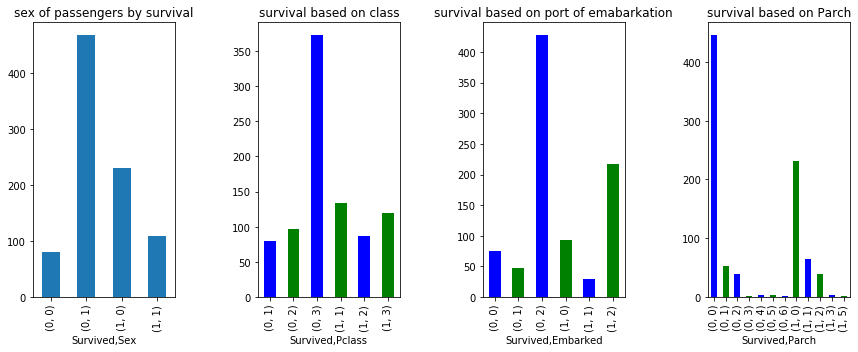

In [19]:

plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
ax = df.groupby(['Survived','Sex'])['Sex'].count().plot(kind = 'bar')
ax.set_title('sex of passengers by survival')
plt.subplot(1,4,2)
ax = df.groupby(['Survived','Pclass'])['Pclass'].count().plot(kind = 'bar', color = ('b','g'))
ax.set_title('survival based on class')
plt.subplot(1,4,3)
ax = df.groupby(['Survived','Embarked'])['Embarked'].count().plot(kind = 'bar', color = ('b','g'))
ax.set_title('survival based on port of emabarkation')
plt.subplot(1,4,4)
ax = df.groupby(['Survived','Parch'])['Parch'].count().plot(kind = 'bar', color = ('b','g'))
ax.set_title('survival based on Parch')

plt.tight_layout()
plt.show()

**Observation:**The sex of the passengers played a huge role in there surval, despite women being fewer than men most of them survived.


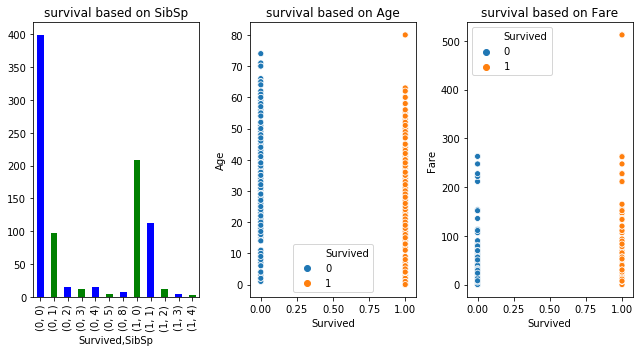

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
ax = df.groupby(['Survived','SibSp'])['SibSp'].count().plot(kind = 'bar', color = ('b','g'))
ax.set_title('survival based on SibSp')
plt.subplot(1,4,2)
ax = sns.scatterplot(df['Survived'], df['Age'], df['Survived']  )
ax.set_title('survival based on Age')
plt.subplot(1,4,3)
ax = sns.scatterplot(df['Survived'], df['Fare'], df['Survived']  )
ax.set_title('survival based on Fare')
plt.tight_layout()
plt.show()

**Observation:** fare played a huge role in survival of the passengers which is a reflection of different classes while on board

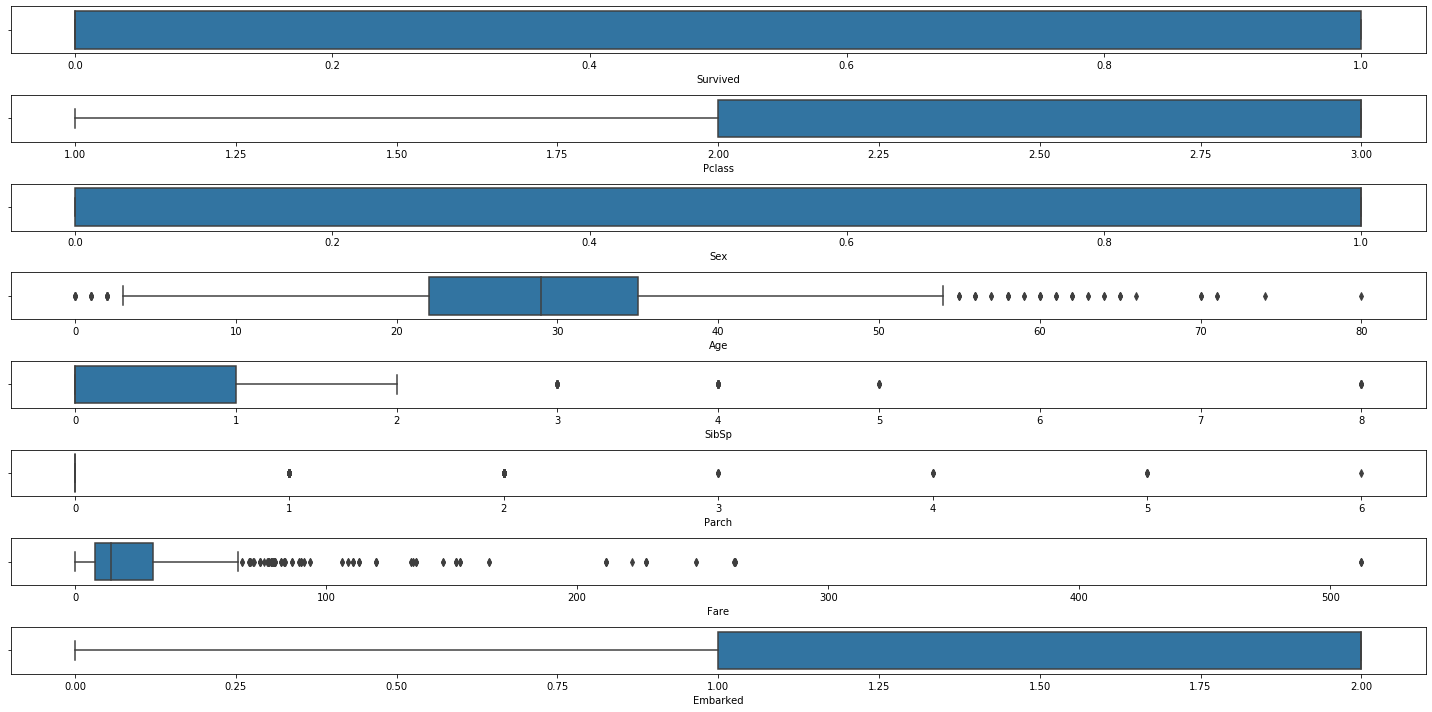

In [21]:
#checking for outliers

col_names = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']
fig, ax = plt.subplots(len(col_names), figsize=(20,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(df[col_val], ax=ax[i])

plt.tight_layout()
plt.show()

The **age** feature has outliers, however since the outliers seem to be reasonable because it refelcets the distribution of ages of the passengers, who range from babies to the elderly. The sibso, also appears to be reasonable since members of an since we can have as much as 8 siblings-or-spouses relationships in the Titanic, the same rationale applies to pasenges with parent/children relationship aboard the Titanic.As well have outliers becauses the reflect different classes which seem to be reasonable.

**Multivariate analysis**

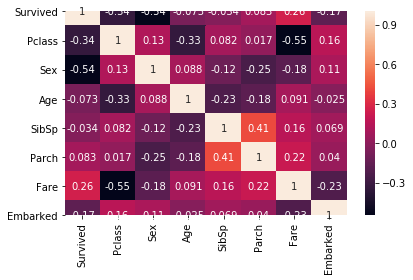

In [23]:
#correlation
sns.heatmap(df.corr(),annot = True)
plt.tight_layout()

 There is a strong positive correlation between sex and survival and a moderate positive correlation from passenger class, and fare.

##  Modelling with KNN
Baseline Model

In [24]:
y = df.Survived.values
x = df.drop(['Survived'],1).values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =50)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn_model1 = knn.fit(x_train,y_train)

In [26]:
#making prediction using our model
y_pred = knn.predict(x_test)

In [27]:
#Measuring accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6966292134831461


**conclusion:**Our accuracy is low , lets see if with hyper parameter tunning we can improve our accuracy

**An optimized model**

In [28]:
#standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)#KNN algorithm performs better with standardized data.


In [29]:
#hyper-parameter tune our model to improve accuracy. We will use the grid search.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute'] }
knn_m = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10 ,n_jobs= 1, verbose  = 0)
print('best parameters:', knn_m.fit(x_train,y_train))

best parameters: GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
#fittting our model with the best parameters
knn_model = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', leaf_size = 30,metric='minkowski',weights='uniform' )
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
#predictin with model.
y_pred = knn_model.predict(x_test)

#assessing the accuracy of the model
print('accuracy:', accuracy_score(y_test, y_pred))


accuracy: 0.8258426966292135


## Experimental design
* Loading and previewing the dataset
* Data cleaning,removing and replacing null values, checking for outliers
* Undertook exploratory data analysis, both bivariate, univariate and multivariate analysis to gain insights about the data
* Modelling with KNearest Neigbhbors and hyper-parameter tunning the model
## Challenging the solution
We do not have know the true picture of the location of the passengers when the tragedy occured.Furthermore, our analysis does not incorporate the safety measures available in the a ship, e.g safety jackets or rescue boats, availability oxygen masks.which we do not know if passengers had access to them

## Did we have the right data? ## 
no,We need additional data of those survived that can help to explain the deaths
 we need to know the causes of death of the non-survivors,could be due to extreme cold, drowning etc... we also lack data on safety measures available in the a ship, e.g safety jackets or rescue boats, availability oxygen masks. 
## Follow up questions?## 
what unique feature did the females have that made them have better chances of survival than men?

## SPAM classification using Naive Bayes model

In [77]:
#loading the dataset
spams = pd.read_csv('spambase.data',header = None, names = ['message', 'label'])
spams.head()

message  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.000 0.0 0.778 0.000 0.000 3.756 61       278   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.132 0.0 0.372 0.180 0.048 5.114 101     1028   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.06 0.0 0.0 0.12 0.0 0.06 0.06 0.0 0.0 0.01 0.143 0.0 0.276 0.184 0.010 9.821 485     2259   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0.00 0.00 0.31 0.00 0.00 3.18 0.00 0.31 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.137 0.0 0.137 0.000 0.000 3.537 40       191   
                                                                                                                                                                                                                                0.135 0.0 0.135 0.000 0.000 3.537 40       191   

                                                                                                                                                                                                                                                                       label  
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.000 0.0 0.778 0.000 0.000 3.756 61       1  
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.132 0.0 0.372 0.180 0.048 5.114 101      1  
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.06 0.0 0.0 0.12 0.0 0.06 0.06 0.0 0.0 0.01 0.143 0.0 0.276 0.184 0.010 9.821 485      1  
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0.00 0.00 0.31 0.00 0.00 3.18 0.00 0.31 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.137 0.0 0.137 0.000 0.000 3.537 40       1  
                                                                                                                                                                                                                                0.135 0.0 0.135 0.000 0.000 3.537 40       1

In [120]:
x = spams['message'].values
y = spams['label'].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =10) 

In [122]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
#fiting the model
gb = gb.fit(x_train,y_train)
#using the model to make prediction
y_pred = gb.predict(x_test)
#measuring accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.6666666666666666
[[543  16]
 [291  71]]


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
#with 70-30 ratio split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state =10) 

In [128]:
gb = GaussianNB()
#fiting the model
gb = gb.fit(x_train,y_train)
#using the model to make prediction
y_pred = mnb.predict(x_test)
#measuring accuracy

print('accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.5944967414916728
[[821   0]
 [560   0]]


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
#with 70-30 ratio split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state =10) 

In [130]:
gb = GaussianNB()
#fiting the model
gb = gb.fit(x_train,y_train)
#using the model to make prediction
y_pred = gb.predict(x_test)
#measuring accuracy

print('accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.6473569876900797
[[793  28]
 [459 101]]


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
#with 60-40 ratio split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.4, random_state =10) 

In [117]:
gb = GaussianNB()
#fiting the model
gb = gb.fit(x_train,y_train)
#using the model to make prediction
y_pred = gb.predict(x_test)
#measuring accuracy

print('accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.639326453014666
[[1049   41]
 [ 623  128]]


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Observation:** increasing the test dataset while at the same time decreasing the train dataset decreases the accuracy of the model.